**OC classification algorithms and autoencoding-based profiling toward zero-day malware detection.**

In the training phase, the autoencoder is trained first. The trained autoencoding model is then utilized to train the OC classifier, which takes the latent representation resulting from the encoder as input and figures out the boundary of the training data.

THIS code actually divided into three parts , first section depicts the supervised learning approach.

Second section depicts the unsupervised approach using ocsvm.

Final section illustrates the unsupervised ocsvm approaches using autoencoding.

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("./data/dataset_1.csv")

In [5]:
data.head()

ID                               md5  Machine  \
0   memtest.exe  631ea355665f28d4707448e442fbf5b8      332   
1       ose.exe  9d10f99a6712e28f8acd5641e3a7ea6b      332   
2     setup.exe  4d92f518527353c0db88a70fddcfd390      332   
3      DW20.EXE  a41e524f8d45f0074fd07805ff0c9b12      332   
4  dwtrig20.exe  c87e561258f2f8650cef999bf643a731      332   

   SizeOfOptionalHeader  Characteristics  MajorLinkerVersion  \
0                   224              258                   9   
1                   224             3330                   9   
2                   224             3330                   9   
3                   224              258                   9   
4                   224              258                   9   

   MinorLinkerVersion  SizeOfCode  SizeOfInitializedData  \
0                   0      361984                 115712   
1                   0      130560                  19968   
2                   0      517120                 621568   
3                   0      585728                 369152   
4                   0      294912                 247296   

   SizeOfUninitializedData  ...  ResourcesNb  ResourcesMeanEntropy  \
0                        0  ...            4              3.262823   
1                        0  ...            2              4.250461   
2                        0  ...           11              4.426324   
3                        0  ...           10              4.364291   
4                        0  ...            2              4.306100   

   ResourcesMinEntropy  ResourcesMaxEntropy  ResourcesMeanSize  \
0             2.568844             3.537939        8797.000000   
1             3.420744             5.080177         837.000000   
2             2.846449             5.271813       31102.272727   
3             2.669314             6.400720        1457.000000   
4             3.421598             5.190603        1074.500000   

   ResourcesMinSize  ResourcesMaxSize  LoadConfigurationSize  \
0               216             18032                      0   
1               518              1156                     72   
2               104            270376                     72   
3                90              4264                     72   
4               849              1300                     72   

   VersionInformationSize  legitimate  
0                      16           1  
1                      18           1  
2                      18           1  
3                      18           1  
4                      18           1  

[5 rows x 57 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           138047 non-null  object 
 1   md5                          138047 non-null  object 
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13 

In [7]:
data['legitimate']

0         1
1         1
2         1
3         1
4         1
         ..
138042    0
138043    0
138044    0
138045    0
138046    0
Name: legitimate, Length: 138047, dtype: int64

In [8]:
columns_drop = ['ID','md5','Machine','SizeOfOptionalHeader','LoaderFlags']

In [9]:
df = data.drop(columns = columns_drop)

In [10]:
df.head()

Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0              258                   9                   0      361984   
1             3330                   9                   0      130560   
2             3330                   9                   0      517120   
3              258                   9                   0      585728   
4              258                   9                   0      294912   

   SizeOfInitializedData  SizeOfUninitializedData  AddressOfEntryPoint  \
0                 115712                        0                 6135   
1                  19968                        0                81778   
2                 621568                        0               350896   
3                 369152                        0               451258   
4                 247296                        0               217381   

   BaseOfCode  BaseOfData    ImageBase  ...  ResourcesNb  \
0        4096      372736    4194304.0  ...            4   
1        4096      143360  771751936.0  ...            2   
2        4096      811008  771751936.0  ...           11   
3        4096      798720  771751936.0  ...           10   
4        4096      536576  771751936.0  ...            2   

   ResourcesMeanEntropy  ResourcesMinEntropy  ResourcesMaxEntropy  \
0              3.262823             2.568844             3.537939   
1              4.250461             3.420744             5.080177   
2              4.426324             2.846449             5.271813   
3              4.364291             2.669314             6.400720   
4              4.306100             3.421598             5.190603   

   ResourcesMeanSize  ResourcesMinSize  ResourcesMaxSize  \
0        8797.000000               216             18032   
1         837.000000               518              1156   
2       31102.272727               104            270376   
3        1457.000000                90              4264   
4        1074.500000               849              1300   

   LoadConfigurationSize  VersionInformationSize  legitimate  
0                      0                      16           1  
1                     72                      18           1  
2                     72                      18           1  
3                     72                      18           1  
4                     72                      18           1  

[5 rows x 52 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Characteristics              138047 non-null  int64  
 1   MajorLinkerVersion           138047 non-null  int64  
 2   MinorLinkerVersion           138047 non-null  int64  
 3   SizeOfCode                   138047 non-null  int64  
 4   SizeOfInitializedData        138047 non-null  int64  
 5   SizeOfUninitializedData      138047 non-null  int64  
 6   AddressOfEntryPoint          138047 non-null  int64  
 7   BaseOfCode                   138047 non-null  int64  
 8   BaseOfData                   138047 non-null  int64  
 9   ImageBase                    138047 non-null  float64
 10  SectionAlignment             138047 non-null  int64  
 11  FileAlignment                138047 non-null  int64  
 12  MajorOperatingSystemVersion  138047 non-null  int64  
 13 

In [12]:
x = df.drop('legitimate',axis=1)
y = df['legitimate']

array([[<Axes: title={'center': 'Characteristics'}>,
        <Axes: title={'center': 'MajorLinkerVersion'}>,
        <Axes: title={'center': 'MinorLinkerVersion'}>,
        <Axes: title={'center': 'SizeOfCode'}>,
        <Axes: title={'center': 'SizeOfInitializedData'}>,
        <Axes: title={'center': 'SizeOfUninitializedData'}>,
        <Axes: title={'center': 'AddressOfEntryPoint'}>],
       [<Axes: title={'center': 'BaseOfCode'}>,
        <Axes: title={'center': 'BaseOfData'}>,
        <Axes: title={'center': 'ImageBase'}>,
        <Axes: title={'center': 'SectionAlignment'}>,
        <Axes: title={'center': 'FileAlignment'}>,
        <Axes: title={'center': 'MajorOperatingSystemVersion'}>,
        <Axes: title={'center': 'MinorOperatingSystemVersion'}>],
       [<Axes: title={'center': 'MajorImageVersion'}>,
        <Axes: title={'center': 'MinorImageVersion'}>,
        <Axes: title={'center': 'MajorSubsystemVersion'}>,
        <Axes: title={'center': 'MinorSubsystemVersion'}>,
  

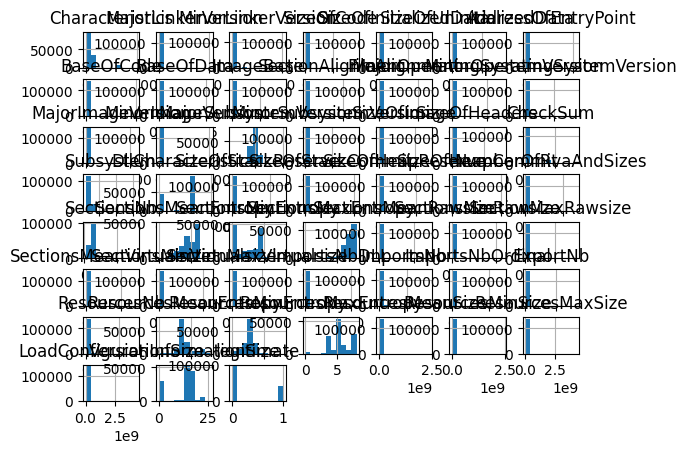

In [12]:
df.hist()

<Axes: >

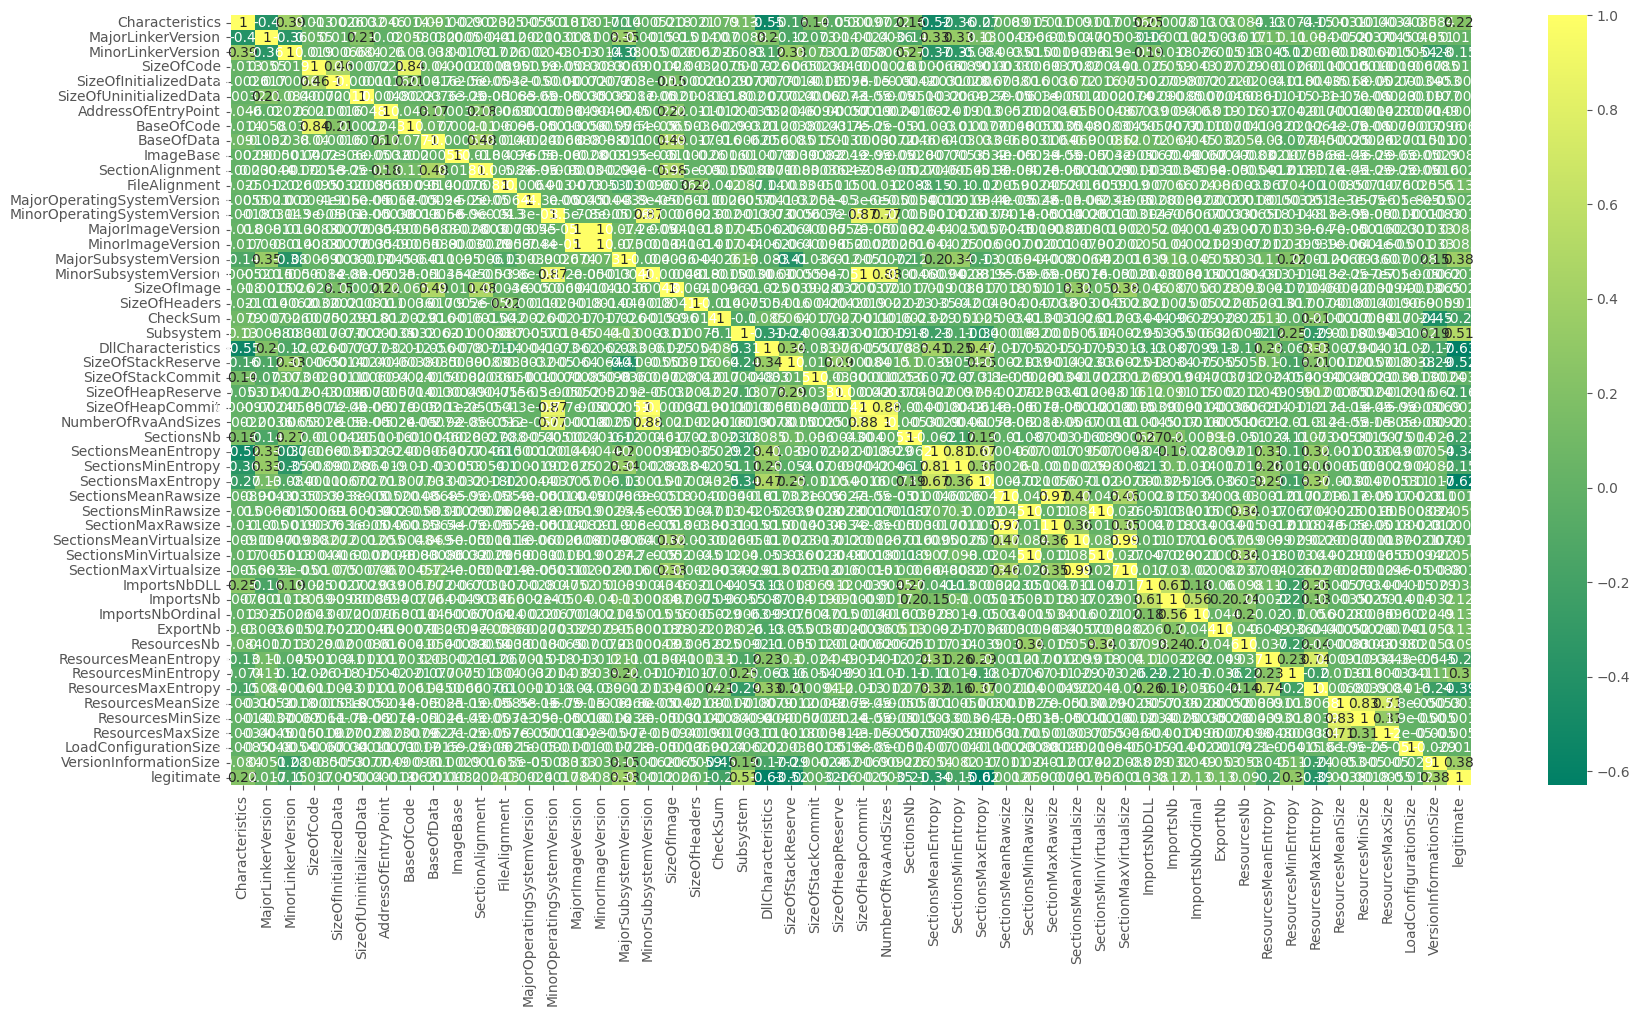

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap="summer")

In [13]:
y

0         1
1         1
2         1
3         1
4         1
         ..
138042    0
138043    0
138044    0
138045    0
138046    0
Name: legitimate, Length: 138047, dtype: int64

In [14]:
y.shape

(138047,)

In [15]:
x.shape

(138047, 51)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [17]:
data =  scaler.fit_transform(x)

scaler_data = pd.DataFrame(x, columns = x.columns)

In [18]:
scaler_data.head()

Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0              258                   9                   0      361984   
1             3330                   9                   0      130560   
2             3330                   9                   0      517120   
3              258                   9                   0      585728   
4              258                   9                   0      294912   

   SizeOfInitializedData  SizeOfUninitializedData  AddressOfEntryPoint  \
0                 115712                        0                 6135   
1                  19968                        0                81778   
2                 621568                        0               350896   
3                 369152                        0               451258   
4                 247296                        0               217381   

   BaseOfCode  BaseOfData    ImageBase  ...  ExportNb  ResourcesNb  \
0        4096      372736    4194304.0  ...         0            4   
1        4096      143360  771751936.0  ...         0            2   
2        4096      811008  771751936.0  ...         1           11   
3        4096      798720  771751936.0  ...         1           10   
4        4096      536576  771751936.0  ...         1            2   

   ResourcesMeanEntropy  ResourcesMinEntropy  ResourcesMaxEntropy  \
0              3.262823             2.568844             3.537939   
1              4.250461             3.420744             5.080177   
2              4.426324             2.846449             5.271813   
3              4.364291             2.669314             6.400720   
4              4.306100             3.421598             5.190603   

   ResourcesMeanSize  ResourcesMinSize  ResourcesMaxSize  \
0        8797.000000               216             18032   
1         837.000000               518              1156   
2       31102.272727               104            270376   
3        1457.000000                90              4264   
4        1074.500000               849              1300   

   LoadConfigurationSize  VersionInformationSize  
0                      0                      16  
1                     72                      18  
2                     72                      18  
3                     72                      18  
4                     72                      18  

[5 rows x 51 columns]

In [19]:
scaler_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Characteristics              138047 non-null  int64  
 1   MajorLinkerVersion           138047 non-null  int64  
 2   MinorLinkerVersion           138047 non-null  int64  
 3   SizeOfCode                   138047 non-null  int64  
 4   SizeOfInitializedData        138047 non-null  int64  
 5   SizeOfUninitializedData      138047 non-null  int64  
 6   AddressOfEntryPoint          138047 non-null  int64  
 7   BaseOfCode                   138047 non-null  int64  
 8   BaseOfData                   138047 non-null  int64  
 9   ImageBase                    138047 non-null  float64
 10  SectionAlignment             138047 non-null  int64  
 11  FileAlignment                138047 non-null  int64  
 12  MajorOperatingSystemVersion  138047 non-null  int64  
 13 

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(scaler_data,y,test_size=0.20,random_state=10)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

#Support Vector Machine (SVM)
param_grid = {'C': [0.1,1.1,1,100],
              'gamma': [1,.80,.56,0.245,0.75,0.40],
              'kernel': ['rbf','poly','linear','sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(scaler_data, y)
grid.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time=42.8min


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix ,classification_report

SVM_RBF = SVC(kernel = 'rbf',random_state=100 , gamma=0.245 ,C=1.1)
SVM_classifier = SVM_RBF.fit(X_train , Y_train)
SVM_predicion = SVM_classifier.predict(X_test)



In [ ]:
CM=confusion_matrix(Y_test,SVM_predicion)
print("Confusion Matrix:\n",CM)
CR=classification_report(Y_test,SVM_predicion)
print("Performance:\n",CR)

Confusion Matrix:
 [[19496     2]
 [ 8031    81]]
Performance:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83     19498
           1       0.98      0.01      0.02      8112

    accuracy                           0.71     27610
   macro avg       0.84      0.50      0.42     27610
weighted avg       0.79      0.71      0.59     27610



Adversial Attack generate  , section - 1 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
#random_forest
rf = RandomForestClassifier(max_depth=100, random_state=20)

rf_cls = rf.fit(X_train , Y_train)
rf_pred = rf_cls.predict(X_test)

'''rf_y_pre = cross_val_predict(rf, scaler_data, y, cv=10)
rf_sc = accuracy_score(y, rf_y_pre) * 100
rf_sc = "{:.2f}".format(rf_sc) ''' 


'rf_y_pre = cross_val_predict(rf, scaler_data, y, cv=10)\nrf_sc = accuracy_score(y, rf_y_pre) * 100\nrf_sc = "{:.2f}".format(rf_sc) '

In [24]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [25]:
from src.ga_attack import GA_Counterfactual, GAdvExample, alibi_ord_to_ohe, alibi_ohe_to_ord
from src.utils import plot_graph, create_onehot_map

In [31]:
#columns_drop = ['ID','md5','Machine','SizeOfOptionalHeader','LoaderFlags']
X_df = x
#y = data['legitimate']

from sklearn.preprocessing import LabelEncoder

for d in X_df.columns[X_df.dtypes=='O']:
    le = LabelEncoder()    
    X_df[d] = le.fit_transform(X_df[d])
    print(d," .....   ",le.classes_)

X = X_df.values
y = y.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [33]:
idx_test = 0

ga_titanic = GAdvExample(feature_names=list(X_df.columns),
                sol_per_pop=30, num_parents_mating=10, cat_vars_ohe=None,
                 num_generations=100, n_runs=100, black_list=[],
                 verbose=False, beta=.95)

x_all, x_changes, x_sucess = ga_titanic.attack(rf, x=X_test[idx_test,:],x_train=X_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
  0%|          | 0/100 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python

In [34]:
ga_titanic.results

In [36]:
ga_titanic.

AttributeError: 'Styler' object has no attribute 'info'

In [67]:
from sklearn.metrics import confusion_matrix ,classification_report

CM=confusion_matrix(y_test,rf_pred)
print("Confusion Matrix:\n",CM)
CR=classification_report(y_test,rf_pred)
print("Performance:\n",CR)

Confusion Matrix:
 [[24060    86]
 [   57 10309]]
Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24146
           1       0.99      0.99      0.99     10366

    accuracy                           1.00     34512
   macro avg       0.99      1.00      1.00     34512
weighted avg       1.00      1.00      1.00     34512



In [ ]:
from sklearn.tree import DecisionTreeClassifier
#decision tree

dt = DecisionTreeClassifier(criterion='entropy',max_depth=100, random_state=10)
dt_y_pre = cross_val_predict(dt,scaler_data, y, cv=10)
dt_sc = accuracy_score(y, dt_y_pre) * 100
dt_sc = "{:.2f}".format(dt_sc)
print(dt_sc)

98.02


In [ ]:
from sklearn.linear_model import LogisticRegression

#logisrtic regression classifier

lg = LogisticRegression(random_state=42)
lg_y_pre = cross_val_predict(lg, scaler_data, y, cv=10)
lg_sc = accuracy_score(y, lg_y_pre) * 100
lg_sc = "{:.2f}".format(lg_sc)
print(lg_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr

70.07


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,random_state=42)

kn_y_pre = cross_val_predict(gb, scaler_data, y, cv=10)
kn_sc = accuracy_score(y,kn_y_pre)*100
kn_sc ="{:.2f}".format(kn_sc)

print(kn_sc)

98.58


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=50,learning_rate=0.1, algorithm='SAMME.R',random_state=42)

kn_y_pre = cross_val_predict(adb, scaler_data, y, cv=10)
kn_sc = accuracy_score(y,kn_y_pre)*100
kn_sc ="{:.2f}".format(kn_sc)

print(kn_sc)

98.22


In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report

In [ ]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('GB', gb), ('RF', rf)], voting='soft')
eclf1.fit(X_train, Y_train)
predictions = eclf1.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19498
           1       0.99      0.99      0.99      8112

    accuracy                           0.99     27610
   macro avg       0.99      0.99      0.99     27610
weighted avg       0.99      0.99      0.99     27610



In [ ]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('GB', gb), ('adb', adb)], voting='soft')
eclf1.fit(X_train, Y_train)
predictions = eclf1.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19498
           1       0.98      0.98      0.98      8112

    accuracy                           0.99     27610
   macro avg       0.99      0.99      0.99     27610
weighted avg       0.99      0.99      0.99     27610



In [ ]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('rf', rf), ('adb', adb)], voting='soft')
eclf1.fit(X_train, Y_train)
predictions = eclf1.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19498
           1       0.99      0.99      0.99      8112

    accuracy                           0.99     27610
   macro avg       0.99      0.99      0.99     27610
weighted avg       0.99      0.99      0.99     27610



One class svm

In [ ]:
data =  scaler.fit_transform(df)

scaler_data_s = pd.DataFrame(df, columns = df.columns)

In [ ]:
scaler_data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Characteristics              138047 non-null  int64  
 1   MajorLinkerVersion           138047 non-null  int64  
 2   MinorLinkerVersion           138047 non-null  int64  
 3   SizeOfCode                   138047 non-null  int64  
 4   SizeOfInitializedData        138047 non-null  int64  
 5   SizeOfUninitializedData      138047 non-null  int64  
 6   AddressOfEntryPoint          138047 non-null  int64  
 7   BaseOfCode                   138047 non-null  int64  
 8   BaseOfData                   138047 non-null  int64  
 9   ImageBase                    138047 non-null  float64
 10  SectionAlignment             138047 non-null  int64  
 11  FileAlignment                138047 non-null  int64  
 12  MajorOperatingSystemVersion  138047 non-null  int64  
 13 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(scaler_data_s,test_size=0.20,random_state=10)

In [ ]:
from sklearn import svm

one_classifier = svm.OneClassSVM(kernel='rbf', nu=0.05)

one_classifier.fit(X_train)

prediction = one_classifier.predict(X_test)


In [ ]:
prediction

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
X_test['legitimate'] = X_test['legitimate'].replace({-1:1, 1: 0})

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
X_test['legitimate']

70097     0
121710    0
84077     0
121078    0
6318      0
         ..
71416     0
82242     0
4585      0
112353    0
96024     0
Name: legitimate, Length: 27610, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

binary_predictions = (prediction == 1).astype(int)


true_labels = X_test['legitimate']


precision = precision_score(true_labels, binary_predictions)
recall = recall_score(true_labels, binary_predictions)
f1 = f1_score(true_labels, binary_predictions)
roc_auc = roc_auc_score(true_labels, binary_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix

confusion  = confusion_matrix(true_labels, binary_predictions)

In [ ]:
confusion

array([[27610]])

In [ ]:
tn, fp, fn, tp = confusion.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)

print("Accuracy:", accuracy)

ValueError: ignored

[link text]Auto encoder with machine learning model

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(scaler_data,y,test_size=0.20,random_state=10)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Input, Lambda, Dense, Flatten

input_dim = X_train.shape[1]
encoding_dim = 128

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer,
                    outputs=decoded)

autoencoder = tf.keras.Sequential()
autoencoder.add(Flatten())

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

# Extract the encoded features from the autoencoder
encoder = Model(inputs=input_layer, outputs=encoded)
encoded_train = encoder.predict(X_train)
encoded_test = encoder.predict(X_test)

# Train a Random Forest classifier on the encoded features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(encoded_train, Y_train)

# Make predictions
y_pred = rf_classifier.predict(encoded_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')


Epoch 1/50
432/432 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/50
432/432 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
432/432 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/50
432/432 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
432/432 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/50
432/432 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
432/432 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/50
432/432 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/50
432/432 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 10/50
432/432 [=======

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,random_state=42)

gb.fit(encoded_train, Y_train)

y_pred = gb.predict(encoded_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9816008692502717


In [ ]:
import joblib

In [ ]:
joblib.dump(rf_classifier,'rf_classifier.hdf5')

['rf_classifier.hdf5']

In [ ]:
pip install h5py

In [ ]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('GB', gb), ('RF', rf)], voting='soft')
eclf1.fit(encoded_train, Y_train)

y_pred = eclf1.predict(encoded_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9868525896414343


In [ ]:
autoencoder.save('rf_classifier.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf


model = tf.keras.models.load_model('rf_classifier.hdf5')

In [ ]:
df

Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0                   258                   9                   0      361984   
1                  3330                   9                   0      130560   
2                  3330                   9                   0      517120   
3                   258                   9                   0      585728   
4                   258                   9                   0      294912   
...                 ...                 ...                 ...         ...   
138042              258                  11                   0      205824   
138043            33167                   2                  25       37888   
138044              258                  10                   0      118272   
138045            33166                   2                  25       49152   
138046              258                  11                   0      111616   

        SizeOfInitializedData  SizeOfUninitializedData  AddressOfEntryPoint  \
0                      115712                        0                 6135   
1                       19968                        0                81778   
2                      621568                        0               350896   
3                      369152                        0               451258   
4                      247296                        0               217381   
...                       ...                      ...                  ...   
138042                 223744                        0               123291   
138043                 185344                        0                40000   
138044                 380416                        0                59610   
138045                  16896                        0                51216   
138046                 468480                        0                22731   

        BaseOfCode  BaseOfData    ImageBase  ...  ResourcesNb  \
0             4096      372736    4194304.0  ...            4   
1             4096      143360  771751936.0  ...            2   
2             4096      811008  771751936.0  ...           11   
3             4096      798720  771751936.0  ...           10   
4             4096      536576  771751936.0  ...            2   
...            ...         ...          ...  ...          ...   
138042        4096      212992    4194304.0  ...            7   
138043        4096       45056    4194304.0  ...           26   
138044        4096      122880    4194304.0  ...           22   
138045        4096       53248    4194304.0  ...           10   
138046        4096      118784    4194304.0  ...            4   

        ResourcesMeanEntropy  ResourcesMinEntropy  ResourcesMaxEntropy  \
0                   3.262823             2.568844             3.537939   
1                   4.250461             3.420744             5.080177   
2                   4.426324             2.846449             5.271813   
3                   4.364291             2.669314             6.400720   
4                   4.306100             3.421598             5.190603   
...                      ...                  ...                  ...   
138042              4.122736             1.370260             7.677091   
138043              3.377663             2.031619             5.050074   
138044              6.825406             2.617026             7.990487   
138045              3.421627             2.060964             4.739744   
138046              4.407252             1.980482             6.115374   

        ResourcesMeanSize  ResourcesMinSize  ResourcesMaxSize  \
0             8797.000000               216             18032   
1              837.000000               518              1156   
2            31102.272727               104            270376   
3             1457.000000                90              4264   
4             1074.500000               849              1300   
...                   ...               ...       

In [ ]:
target_label = 1
epsilon = 0.7

In [ ]:
adversarial_dataset = df.copy()

In [ ]:
!pip install -U scikit-learn

  Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
adversarial-robustness-toolbox 1.16.0 requires scikit-learn<1.2.0,>=0.22.2, but you have scikit-learn 1.3.2 which is incompatible.
